In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_data = pd.read_csv("../../process_dataset/examples_0609/1_first_result.csv")
df_data.head(5)

,sex,age,t2m_pre_mean_rr,t2m_pre_rmssd,t2m_pre_sd1,t2m_pre_pns,t2m_pre_mean_hr,t2m_pre_stress,t2m_pre_sd2,t2m_pre_sns,...,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,height mt,imc,check_altura,our_imc,check_imc
0,1.0,75.0,74.8,21.7,274.0,-140.0,80,149.0,726.0,184.0,...,70,82.666667,38,70.0,160,1.60,27.343750,1,27.3437,1
1,1.0,66.0,95.3,18.8,285.0,-54.0,63,145.0,715.0,68.0,...,72,88.666667,50,52.0,149,1.49,23.422368,1,23.4224,1
2,2.0,77.0,87.7,11.7,303.0,-105.0,68,258.0,697.0,276.0,...,85,98.333333,40,81.0,170,1.70,28.027682,1,28.0277,1
3,1.0,77.0,81.9,17.5,376.0,-106.0,73,249.0,624.0,283.0,...,72,90.000000,54,85.0,160,1.60,33.203125,1,33.2031,1
4,1.0,73.0,84.6,13.6,295.0,-115.0,71,166.0,705.0,149.0,...,80,96.666667,50,69.0,151,1.51,30.261831,1,30.2618,1


In [3]:
df_data = df_data.drop(columns=['imc', 'check_altura', 'check_imc'])
df_data

,sex,age,t2m_pre_mean_rr,t2m_pre_rmssd,t2m_pre_sd1,t2m_pre_pns,t2m_pre_mean_hr,t2m_pre_stress,t2m_pre_sd2,t2m_pre_sns,...,t2m_pre_lf,t2m_pre_vlf,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,height mt,our_imc
0,1.0,75.0,74.8,21.7,274.0,-140.00,80,149.0,726.0,184.00,...,713,172,108,70,82.666667,38,70.0,160,1.60,27.3437
1,1.0,66.0,95.3,18.8,285.0,-54.00,63,145.0,715.0,68.00,...,226,29,122,72,88.666667,50,52.0,149,1.49,23.4224
2,2.0,77.0,87.7,11.7,303.0,-105.00,68,258.0,697.0,276.00,...,137,9,125,85,98.333333,40,81.0,170,1.70,28.0277
3,1.0,77.0,81.9,17.5,376.0,-106.00,73,249.0,624.0,283.00,...,130,14,126,72,90.000000,54,85.0,160,1.60,33.2031
4,1.0,73.0,84.6,13.6,295.0,-115.00,71,166.0,705.0,149.00,...,66,18,130,80,96.666667,50,69.0,151,1.51,30.2618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1.0,80.0,987.0,6.6,NaN,-0.61,61,33.1,NaN,3.32,...,19,7,152,82,105.333333,70,80.9,167,1.67,29.0079
525,2.0,67.0,790.0,16.9,NaN,-1.28,76,19.6,NaN,2.24,...,196,88,134,87,102.666667,47,68.1,154,1.54,28.7148
526,2.0,77.0,814.0,23.8,NaN,-0.98,74,13.8,NaN,1.20,...,261,39,141,80,100.333333,61,67.1,152,1.52,29.0426
527,2.0,61.0,912.0,16.6,NaN,-0.78,66,15.8,NaN,1.05,...,301,27,106,58,74.000000,48,58.4,162,1.62,22.2527


In [4]:
df_data_null = df_data.isna()

In [5]:
matrix_data = []

for column in df_data_null.columns:
    value_counts = df_data_null[column].value_counts()

    null_counts = 0
    not_null_counts = 0

    if True in value_counts.index:
        null_counts = value_counts[True]
    
    if False in value_counts.index:
        not_null_counts = value_counts[False]

    row = [column, null_counts, not_null_counts]
    matrix_data.append(row)

df_summary_nones = pd.DataFrame(data=matrix_data, columns=["column_name", "null_values", "not_null_values"])
df_summary_nones.sort_values(by="null_values", ascending=False)


,column_name,null_values,not_null_values
4,t2m_pre_sd1,80,449
8,t2m_pre_sd2,77,452
10,t2m_pre_sdnn,11,518
7,t2m_pre_stress,10,519
3,t2m_pre_rmssd,8,521
1,age,0,529
5,t2m_pre_pns,0,529
2,t2m_pre_mean_rr,0,529
0,sex,0,529
6,t2m_pre_mean_hr,0,529


In [6]:
df_data_null['sex'].value_counts()

sex
False    529
Name: count, dtype: int64

In [7]:
df_data = df_data.drop(columns=["t2m_pre_sd1", "t2m_pre_sd2"])
df_data

,sex,age,t2m_pre_mean_rr,t2m_pre_rmssd,t2m_pre_pns,t2m_pre_mean_hr,t2m_pre_stress,t2m_pre_sns,t2m_pre_sdnn,t2m_pre_hf,t2m_pre_lf,t2m_pre_vlf,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,height mt,our_imc
0,1.0,75.0,74.8,21.7,-140.00,80,149.0,184.00,308.0,222,713,172,108,70,82.666667,38,70.0,160,1.60,27.3437
1,1.0,66.0,95.3,18.8,-54.00,63,145.0,68.00,255.0,87,226,29,122,72,88.666667,50,52.0,149,1.49,23.4224
2,2.0,77.0,87.7,11.7,-105.00,68,258.0,276.00,147.0,26,137,9,125,85,98.333333,40,81.0,170,1.70,28.0277
3,1.0,77.0,81.9,17.5,-106.00,73,249.0,283.00,170.0,118,130,14,126,72,90.000000,54,85.0,160,1.60,33.2031
4,1.0,73.0,84.6,13.6,-115.00,71,166.0,149.00,176.0,66,66,18,130,80,96.666667,50,69.0,151,1.51,30.2618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1.0,80.0,987.0,6.6,-0.61,61,33.1,3.32,6.5,11,19,7,152,82,105.333333,70,80.9,167,1.67,29.0079
525,2.0,67.0,790.0,16.9,-1.28,76,19.6,2.24,20.0,350,196,88,134,87,102.666667,47,68.1,154,1.54,28.7148
526,2.0,77.0,814.0,23.8,-0.98,74,13.8,1.20,26.7,521,261,39,141,80,100.333333,61,67.1,152,1.52,29.0426
527,2.0,61.0,912.0,16.6,-0.78,66,15.8,1.05,22.4,395,301,27,106,58,74.000000,48,58.4,162,1.62,22.2527


In [8]:
variables_to_check = ['t2m_pre_sdnn', 't2m_pre_stress', 't2m_pre_rmssd']	

<Axes: xlabel='t2m_pre_sdnn'>

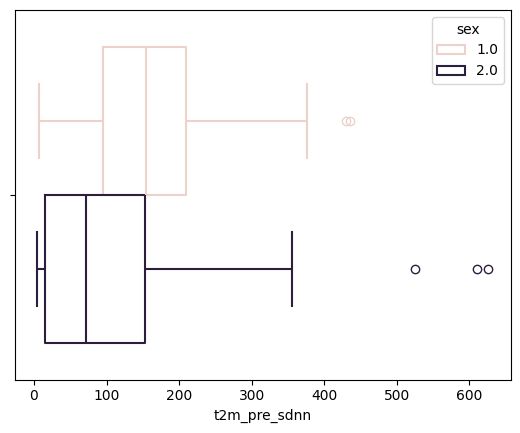

In [9]:
sns.boxplot(data=df_data, x=variables_to_check[0], hue="sex", fill=False)

<Axes: xlabel='t2m_pre_sdnn', ylabel='Count'>

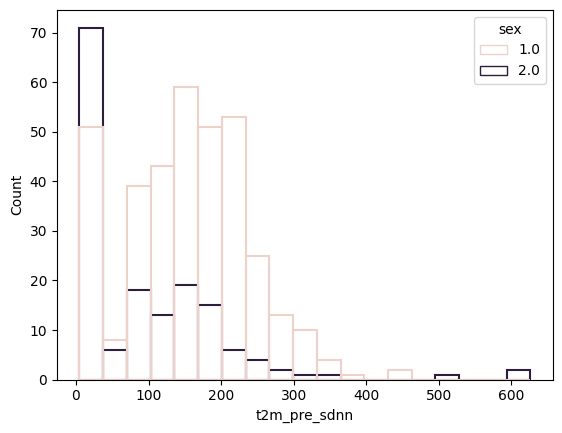

In [10]:
sns.histplot(data=df_data, x=variables_to_check[0], hue="sex", fill=False)

<Axes: xlabel='t2m_pre_stress'>

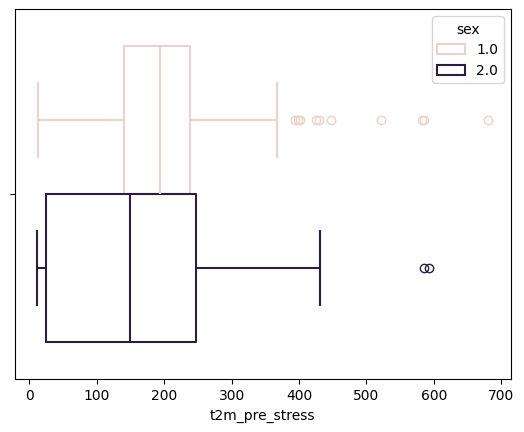

In [11]:
sns.boxplot(data=df_data, x=variables_to_check[1], hue="sex", fill=False)

<Axes: xlabel='t2m_pre_stress', ylabel='Count'>

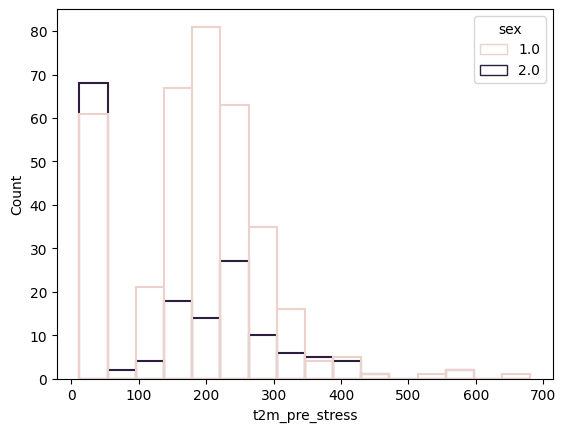

In [12]:
sns.histplot(data=df_data, x=variables_to_check[1], hue="sex", fill=False)

<Axes: xlabel='t2m_pre_rmssd'>

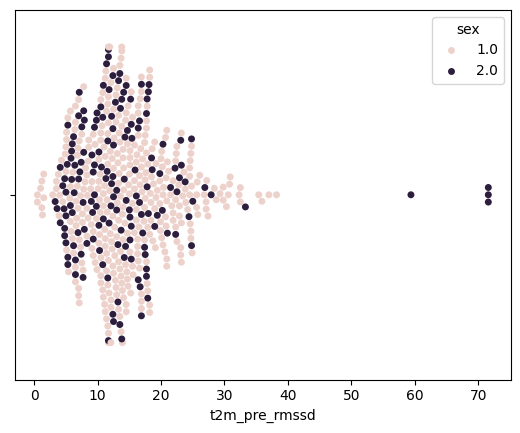

In [13]:
sns.swarmplot(data=df_data, x=variables_to_check[2], hue="sex")

<Axes: xlabel='t2m_pre_rmssd', ylabel='Count'>

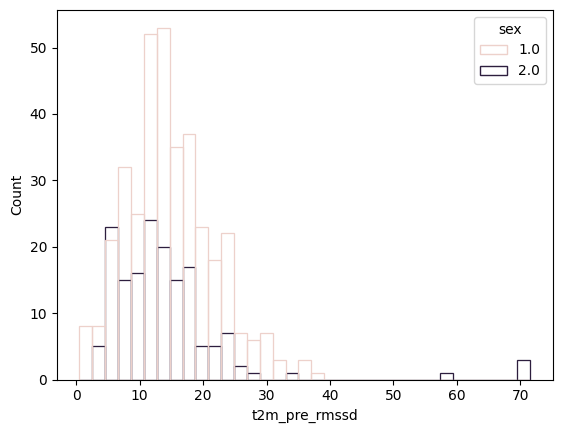

In [14]:
sns.histplot(data=df_data, x=variables_to_check[2], hue="sex", fill=False)

In [15]:
df_data[variables_to_check[2]] = df_data[variables_to_check[2]].fillna(df_data[variables_to_check[2]].mean())

In [16]:
df_data[variables_to_check[2]].isna().value_counts()

t2m_pre_rmssd
False    529
Name: count, dtype: int64

In [17]:
df_data_1 = df_data[df_data["sex"] == 1]
df_data_2 = df_data[df_data["sex"] == 2]

In [18]:
df_data_1 = df_data_1.fillna(df_data_1.median())
df_data_2 = df_data_2.fillna(df_data_2.median())

In [19]:
df_data = pd.concat([df_data_1, df_data_2], axis=0)

In [20]:
df_data.shape

(529, 20)

In [21]:
df_data.describe().shape

(8, 20)

In [22]:
df_data.to_csv("../../process_dataset/examples_0609/2_datos_no_nulos.csv", index=False)